# **Loan Prediction**

**Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Uploading dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_lAUu6dG.csv to test_lAUu6dG (1).csv
Saving train_ctrUa4K.csv to train_ctrUa4K (1).csv


**Reading csv file**

In [ ]:
import io
train = pd.read_csv(io.StringIO(uploaded['train_ctrUa4K.csv'].decode('utf-8')))
test = pd.read_csv(io.StringIO(uploaded['test_lAUu6dG.csv'].decode('utf-8')))

**Understanding data**

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.shape


(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# **EDA (exploratory data analysis)**

Univariant analysis

Independent Variable (Categorical)

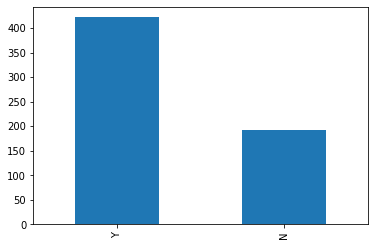

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

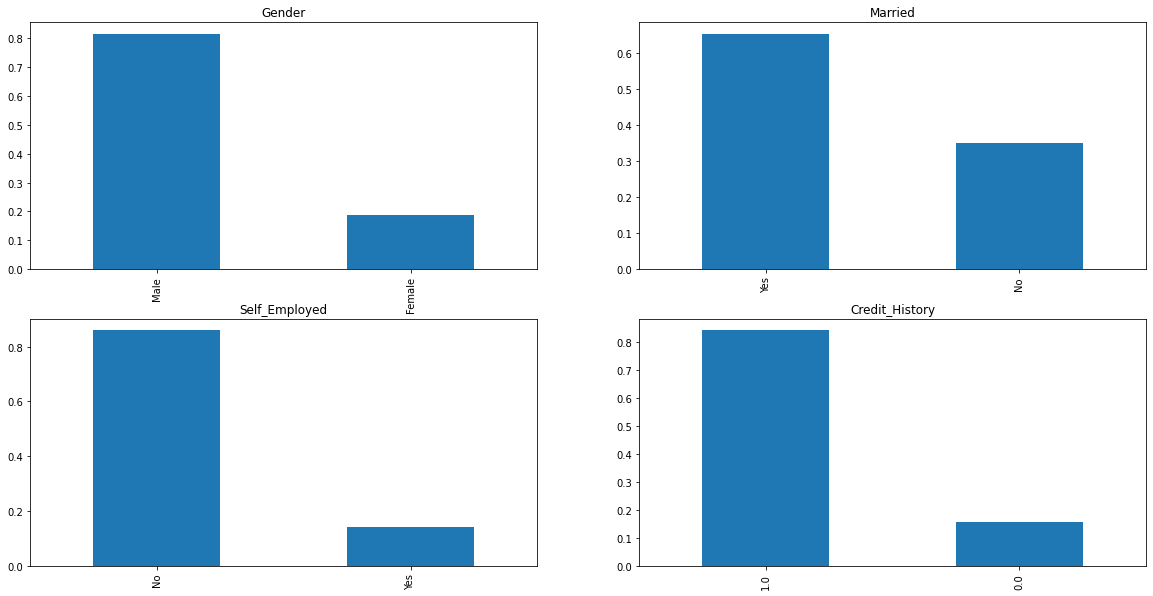

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Independent Variable (Ordinal)

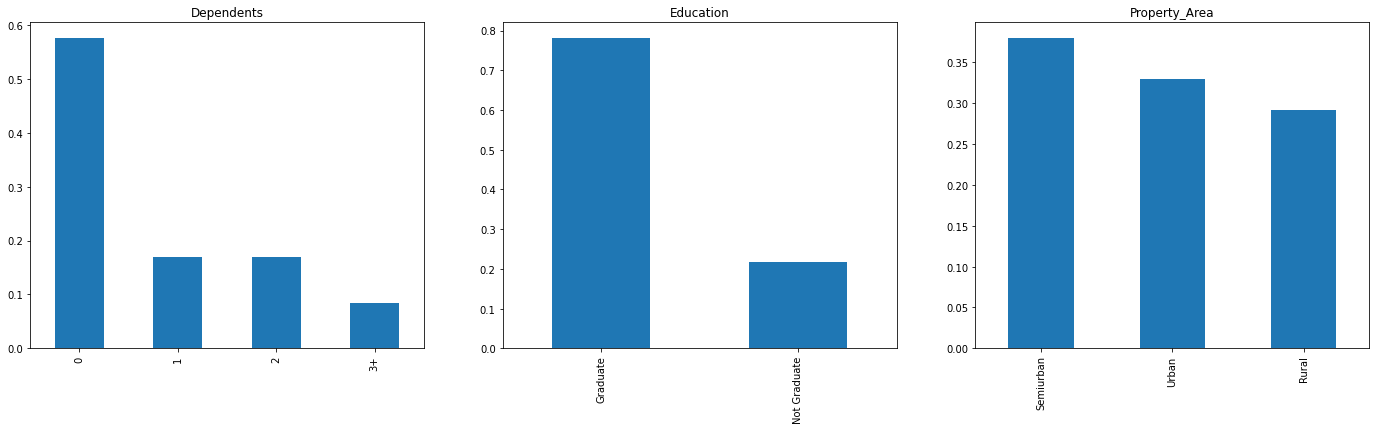

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Independent Variable (Numerical)

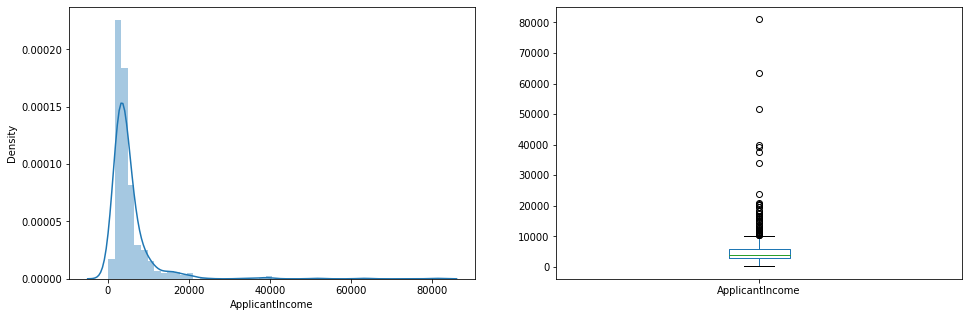

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

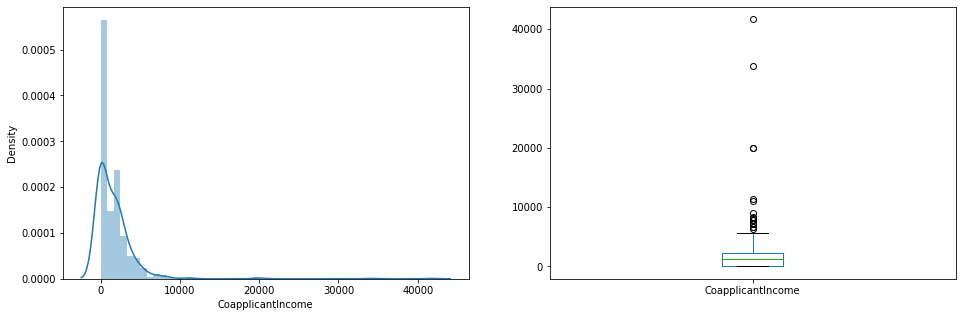

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

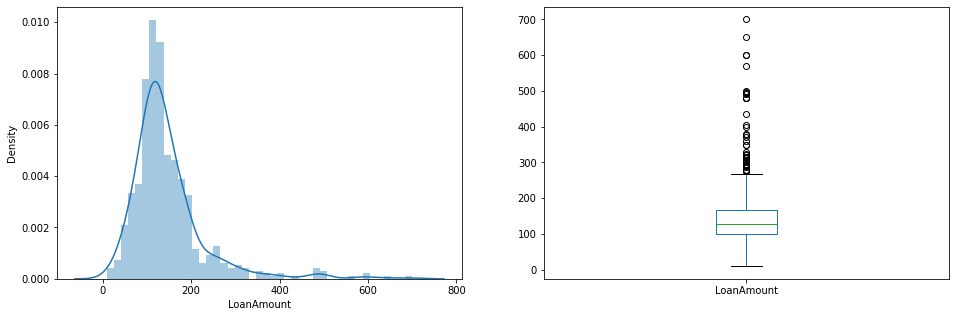

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# **EDA(exploratory data analysis)**

Bivariant analysis

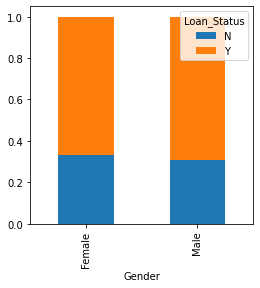

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))

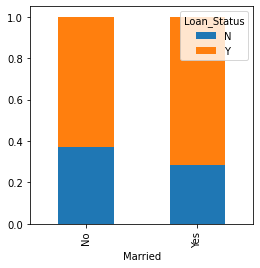

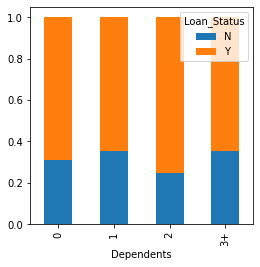

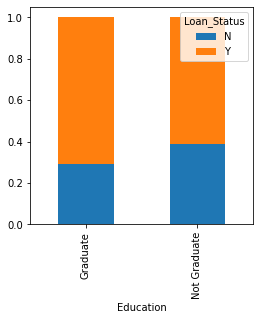

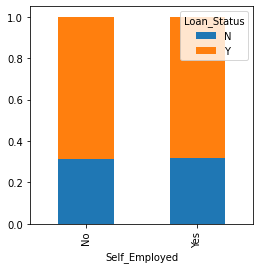

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()

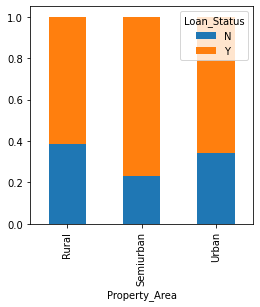

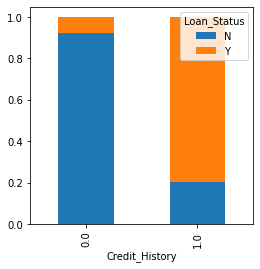

In [ ]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.show()

**Numerical Independent Variable vs Target Variable**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

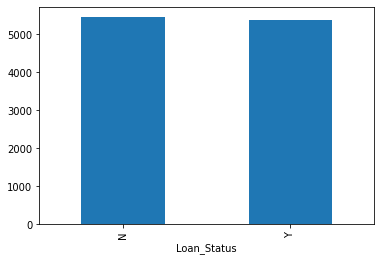

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

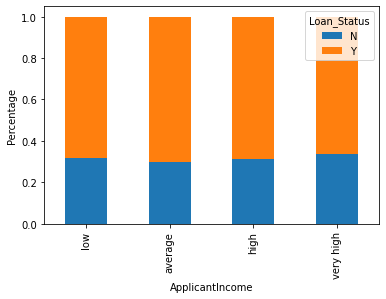

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train ['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

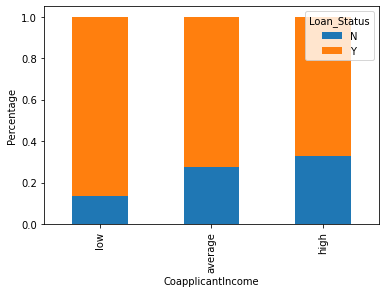

In [ ]:
bins=[0,1000,3000,42000]
group=['low','average','high']
train ['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

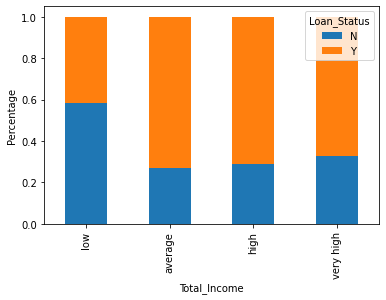

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train ['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

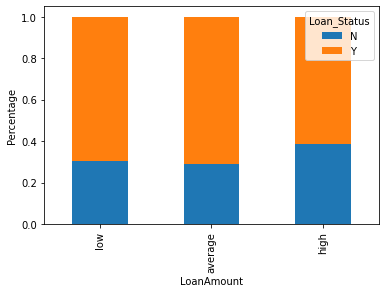

In [ ]:
bins=[0,100,200,700]
group=['low','average','high']
train ['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

**droping the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will replace N with 0 and Y with 1.**

In [ ]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin','LoanAmount_bin'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

**Finding correlation between all the numerical variables by using heat map to visualize . Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.**

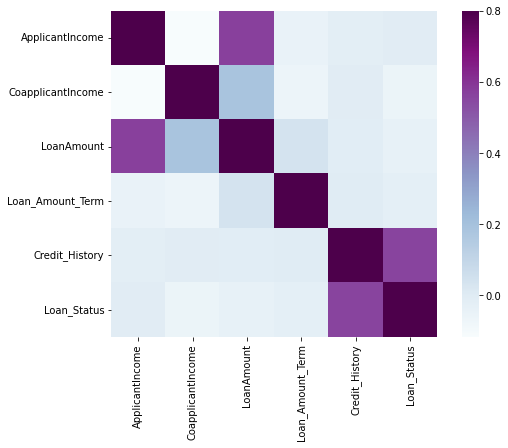

In [ ]:
matrix = train.corr() 
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu');

**Missing value imputation**

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

**Outlier Treatment**

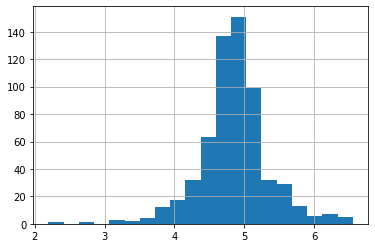

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

# **Model Building**

In [ ]:
train.drop('Loan_ID',axis=1)
test.drop('Loan_ID',axis=1)
X=train.drop('Loan_Status',1)
Y=train.Loan_Status

In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

**Dividing data set into train,validation and test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.33,random_state=50)

**1. Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7783251231527094

**a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.292% (2.275%)


# **Feature Engineering**

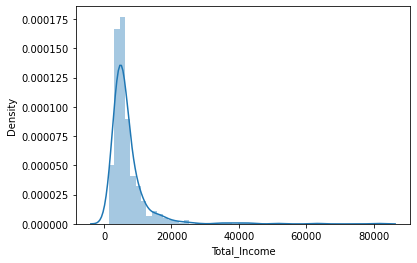

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income']);

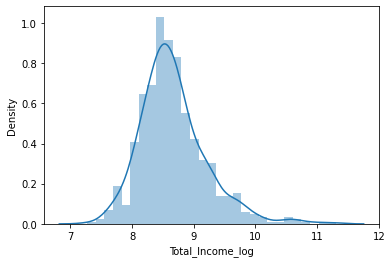

In [ ]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log']);

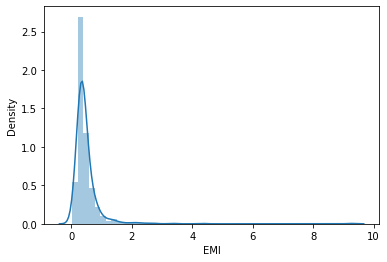

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

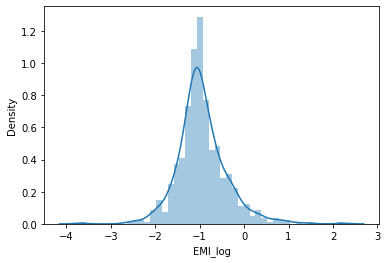

In [ ]:
train['EMI_log']=np.log(train['EMI'])
test['EMI_log']=np.log(test['EMI'])
sns.distplot(train['EMI_log']);

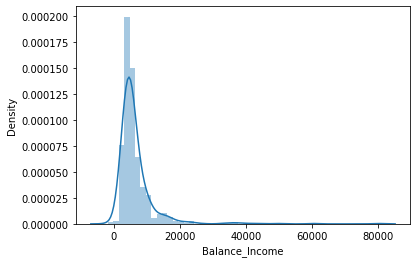

In [ ]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income']);

In [ ]:
train=train.drop(['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1)
test=test.drop(['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1)

**After creating new features, we continue the model building process. So we will start with the logistic regression model and then use SVM**

Logistic Regression

In [ ]:
X=train.drop('Loan_Status',1)
Y=train.Loan_Status
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.292% (2.275%)


**Predicted Values and Actual values of our loan prediction where 0-NO and 1-YES **

In [ ]:
#predict the values
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("Predicted",pred)
print("Actual\n",y_test)

Predicted [1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]
Actual
 16     1
201    1
541    0
542    1
544    1
      ..
560    1
109    1
253    1
129    0
386    1
Name: Loan_Status, Length: 203, dtype: int64


**SVM(support vector classifier)**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_cv)  
accuracy_score(y_cv,y_pred)

0.7093596059113301

**Accuracy based on evaluation of our model on the unseen data**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = SVC(kernel="linear")
results = cross_val_score(model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 75.074% (2.732%)


# **So in our case accuracy of logistic Regression model is more than of Svm Model**